In [2]:
import pennylane as qml


量子电路被构造为特殊的 Python 函数、量子电路函数或简称量子函数。 例如：

In [ ]:
def my_quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.Z(wires=1))

注意

PennyLane 使用术语“线”来指代量子比特，对于连续变量设备，一根线对应于量子模式。

注意

量子函数从 QNode 在设备上进行计算。

## 定义设备
要运行（并随后优化）量子电路，首先需要指定一个计算设备。

设备是类的实例，可以表示模拟器或硬件设备。他们可以是 使用 loader 实例化。

PennyLane 提供了一些基本设备，例如 'default.qubit'、'default.mixed'、'lightning.qubit'、'default.gaussian'、'default.clifford'、'default.tensor' 、;可以将其他设备作为插件安装。请注意，设备的选择在很大程度上决定了您的计算速度，以及 可以传递给设备加载程序的可用选项。


In [4]:
dev = qml.device('lightning.qubit', wires=20) 

In [5]:
dev_unique_wires = qml.device('default.qubit', wires=['aux', 'q1', 'q2'])

In [6]:
def my_quantum_function(x, y):
    qml.RZ(x, wires='q1')
    qml.CNOT(wires=['aux' ,'q1'])
    qml.RY(y, wires='q2')
    return qml.expval(qml.PauliZ('q2'))

## 创建量子节点

在 PennyLane 中，量子计算涉及执行一个或多个量子电路， 表示为量子节点对象。量子节点用于 声明量子电路，并将计算与执行它的特定设备绑定。

In [7]:
import numpy as np

circuit = qml.QNode(my_quantum_function, dev_unique_wires)

In [8]:
circuit(np.pi/4, 0.7)

np.float64(0.7648421872844884)

In [9]:
print(qml.draw(circuit)(np.pi/4, 0.7))

aux: ───────────╭●─┤     
 q1: ──RZ(0.79)─╰X─┤     
 q2: ──RY(0.70)────┤  <Z>


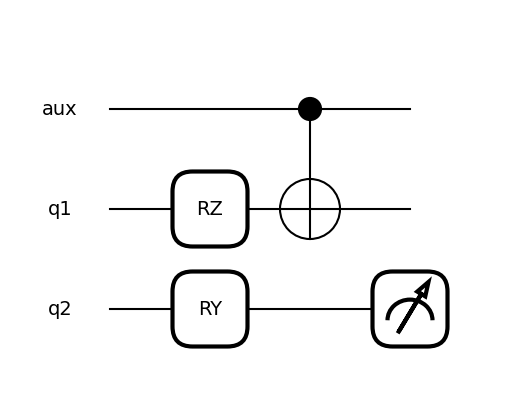

In [10]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)(np.pi/4, 0.7)
plt.show()

In [11]:
new_dev = qml.device('lightning.qubit', wires=dev_unique_wires.wires)
new_circuit = circuit.update(device = new_dev)
print(new_circuit.device.name)
print(qml.draw(new_circuit)(np.pi/4, 0.7))

lightning.qubit
aux: ───────────╭●─┤     
 q1: ──RZ(0.79)─╰X─┤     
 q2: ──RY(0.70)────┤  <Z>


In [14]:
from functools import partial

dev = qml.device('default.qubit', wires=2)


@partial(qml.set_shots, shots=10)
@qml.qnode(dev)
def circuit(x):
    qml.RX(x, wires=0)
    qml.CNOT([0, 1])
    return qml.sample(qml.Z(1))

result = circuit(0.5)


In [15]:
result

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])